# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('demo01.csv',na_values=('NA','',' ','nan','NAN','na'))
print ("As variáveis: {}".format(df.columns.transpose()))

As variáveis: Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')


 A função shape indica 16 variáveis.

In [19]:
#Tipos de dados de cada variável
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [20]:
#Quantidade de missings
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


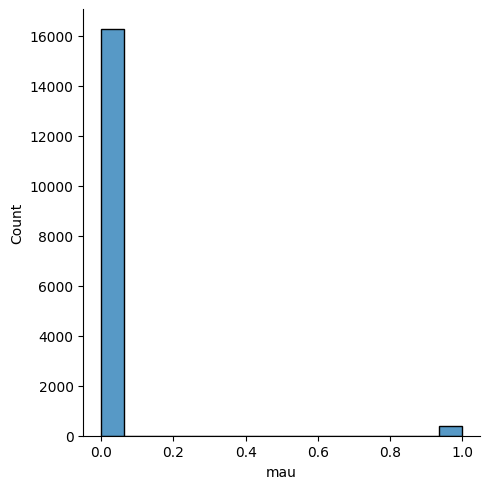

In [21]:
#Distribuição da variável resposta (mau)
ax=sns.displot(x="mau",data=df, legend=True)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [52]:
df_dtypes = pd.DataFrame({
    'variavel': df.columns,
    'tipo_dado': df.dtypes.values
})

# 2. Inicializar uma lista vazia para contar as categorias
qtd_categorias = []

# 3. Loop para contar o número de categorias únicas de cada variável
for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())  # Contar categorias e adicionar à lista

# 4. Adicionar a lista de contagem de categorias ao DataFrame de metadados
df_dtypes['qtd_categorias'] = qtd_categorias

# Exibindo o DataFrame final
print(df_dtypes)

                 variavel tipo_dado  qtd_categorias
0                    sexo    object               2
1        posse_de_veiculo    object               2
2         posse_de_imovel    object               2
3              qtd_filhos     int64               8
4              tipo_renda    object               5
5                educacao    object               5
6            estado_civil    object               5
7         tipo_residencia    object               6
8                   idade   float64            5298
9           tempo_emprego   float64            3005
10         possui_celular     int64               1
11  possui_fone_comercial     int64               2
12            possui_fone     int64               2
13           possui_email     int64               2
14  qt_pessoas_residencia   float64               9
15                    mau      bool               2


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [61]:
qualitativas = df.select_dtypes(include=['object', 'category']).columns

# 2. Criar variáveis dummy (omitindo a coluna original)
df_dummies = pd.get_dummies(df[qualitativas], drop_first=True)

# 3. Converter colunas que tenham valores booleanos (True/False) para inteiros (1/0)
df_dummies = df_dummies.astype(int)

# 4. Remover variáveis originais do tipo qualitativo
df_numerico = df.drop(columns=qualitativas)

# 5. Adicionar as colunas dummy ao DataFrame numérico
df_final = pd.concat([df_numerico, df_dummies], axis=1)

df_final['mau'] = df_final['mau'].astype(int)

df_final.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [62]:
crosstab_email = pd.crosstab(df_final['possui_email'], df_final['mau'], normalize='index') * 100

# 2. Criar tabela cruzada para 'posse_de_veiculo' e 'mau'
crosstab_veiculo = pd.crosstab(df_final['posse_de_veiculo_Y'], df_final['mau'], normalize='index') * 100

# Exibir as tabelas cruzadas
print("Tabela cruzada - Possui Email vs Mau:")
print(crosstab_email)

print("\nTabela cruzada - Posse de Veículo vs Mau:")
print(crosstab_veiculo)

Tabela cruzada - Possui Email vs Mau:
mau                   0         1
possui_email                     
0             97.626895  2.373105
1             97.972973  2.027027

Tabela cruzada - Posse de Veículo vs Mau:
mau                         0         1
posse_de_veiculo_Y                     
0                   97.573197  2.426803
1                   97.790482  2.209518


Pelo fato de as proporções de mau = 1 serem bem próximas entre os que possuem e não possuem email (2.37% vs. 2.03%) e  (2.43% vs. 2.21%) para posse_de_veiculo, podemos inferir que essas variáveis não são muito poderosas, pois a diferença entre as proporções é pequena. Ou seja elas não descrevem muito bem os resultados.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [63]:
df_final.to_csv('demo01.csv', index=False)